# LSTM

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("data_LSTM_bourse.csv", header = 0)

In [4]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
yahoo = df[df['symbol'] == 'YHOO']

In [6]:
yahoo["high"]

713       17.200001
1181      17.230000
1649      17.299999
2117      16.900000
2585      16.760000
            ...    
849257    38.810001
849757    39.070000
850257    39.220001
850757    38.930000
851257    39.000000
Name: high, Length: 1762, dtype: float64

In [7]:
yahoo_stock=yahoo.values[:,-2].astype("float32")
yahoo_stock.shape

(1762,)

In [8]:
yahoo.values[:,-2].astype("float32")

array([17.2 , 17.23, 17.3 , ..., 39.22, 38.93, 39.  ], dtype=float32)

In [9]:
yahoo_stock = yahoo_stock.reshape(yahoo_stock.shape[0], 1)
yahoo_stock.shape

(1762, 1)

In [10]:
yahoo_stock

array([[17.2 ],
       [17.23],
       [17.3 ],
       ...,
       [39.22],
       [38.93],
       [39.  ]], dtype=float32)

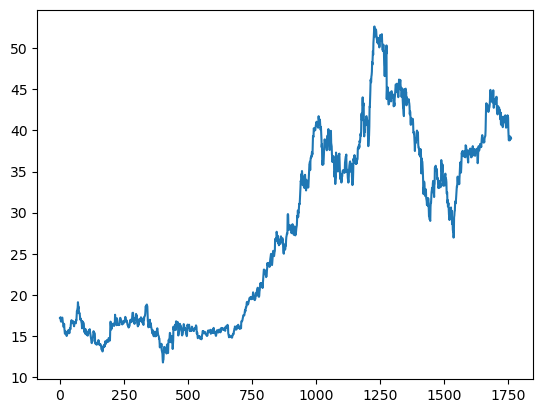

In [11]:
plt.plot(yahoo_stock)

In [12]:
yahoo

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...,...
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0


In [13]:
train_size = int(len(yahoo_stock) * 0.8)
test_size = len(yahoo_stock) - train_size
train, test = yahoo_stock[0:train_size,:], yahoo_stock[train_size:len(yahoo),:]
print(len(train), len(test))

1409 353


In [14]:
print(train_size,test_size)

1409 353


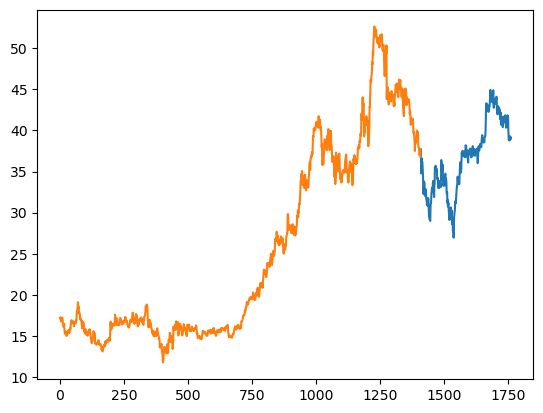

In [15]:
plt.plot(range(train_size, len(yahoo_stock)), test)
plt.plot(range(0,train_size), train)

In [16]:
def create_dataset(dataset,look_back = 5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
trainX, trainY = create_dataset(train)

In [18]:
testX, testY = create_dataset(test)

In [19]:
print(trainX.shape)
print(trainX)
print(trainY.shape)
print(trainY)

(1404, 5)
[[17.2  17.23 17.3  16.9  16.76]
 [17.23 17.3  16.9  16.76 16.83]
 [17.3  16.9  16.76 16.83 16.86]
 ...
 [37.92 37.69 37.57 36.98 37.21]
 [37.69 37.57 36.98 37.21 37.71]
 [37.57 36.98 37.21 37.71 37.52]]
(1404,)
[16.83 16.86 16.98 ... 37.71 37.52 36.76]


In [20]:
print(testX.shape)
print(testX)
print(testY.shape)
print(testY)

(348, 5)
[[37.69 36.77 34.77 36.61 36.35]
 [36.77 34.77 36.61 36.35 36.24]
 [34.77 36.61 36.35 36.24 36.19]
 ...
 [39.18 39.32 38.79 38.81 39.07]
 [39.32 38.79 38.81 39.07 39.22]
 [38.79 38.81 39.07 39.22 38.93]]
(348,)
[36.24 36.19 35.67 34.95 34.02 32.28 33.03 32.62 33.77 33.57 32.99 32.1
 32.03 32.74 32.29 32.83 31.8  31.59 31.43 30.92 31.23 31.77 31.33 30.8
 31.74 30.92 30.57 29.57 29.71 29.22 29.23 29.11 29.   30.71 31.2  31.19
 31.99 32.5  32.69 33.02 32.83 32.49 33.49 33.86 33.63 33.59 32.43 31.9
 33.36 33.49 35.47 35.27 35.15 35.7  35.48 35.34 35.24 35.3  35.2  34.08
 34.13 34.23 33.85 33.04 32.99 33.12 33.02 33.5  33.3  33.87 33.19 33.52
 33.09 33.83 33.89 36.39 35.72 35.2  34.92 34.98 35.84 34.73 34.15 33.27
 33.39 33.88 34.08 33.63 33.3  34.21 34.58 34.74 33.91 34.17 34.04 33.69
 32.35 32.33 32.46 31.19 31.54 30.75 30.97 31.17 30.57 29.77 30.   29.11
 29.8  30.52 30.39 30.19 30.53 30.63 29.51 29.79 30.23 28.61 29.23 29.14
 27.97 27.69 27.81 26.97 27.32 29.44 29.66 30.14 30.2

In [21]:
look_back = 5

# creat model

In [22]:
model = Sequential()
model.add(LSTM(input_shape=(look_back,1), units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


# fit model

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=150,
    validation_split=0.05)

Epoch 1/150
11/11 [==============================] - 10s 90ms/step - loss: 670.3197 - accuracy: 0.0000e+00 - val_loss: 1472.3105 - val_accuracy: 0.0000e+00
Epoch 2/150
11/11 [==============================] - 0s 21ms/step - loss: 547.6085 - accuracy: 0.0000e+00 - val_loss: 1285.8003 - val_accuracy: 0.0000e+00
Epoch 3/150
11/11 [==============================] - 0s 20ms/step - loss: 458.1203 - accuracy: 0.0000e+00 - val_loss: 1142.9685 - val_accuracy: 0.0000e+00
Epoch 4/150
11/11 [==============================] - 0s 16ms/step - loss: 396.4505 - accuracy: 0.0000e+00 - val_loss: 1040.2300 - val_accuracy: 0.0000e+00
Epoch 5/150
11/11 [==============================] - 0s 15ms/step - loss: 356.0022 - accuracy: 0.0000e+00 - val_loss: 978.0930 - val_accuracy: 0.0000e+00
Epoch 6/150
11/11 [==============================] - 0s 16ms/step - loss: 331.9727 - accuracy: 0.0000e+00 - val_loss: 933.4634 - val_accuracy: 0.0000e+00
Epoch 7/150
11/11 [==============================] - 0s 15ms/step - los

In [25]:
print(trainX)

[[17.2  17.23 17.3  16.9  16.76]
 [17.23 17.3  16.9  16.76 16.83]
 [17.3  16.9  16.76 16.83 16.86]
 ...
 [37.92 37.69 37.57 36.98 37.21]
 [37.69 37.57 36.98 37.21 37.71]
 [37.57 36.98 37.21 37.71 37.52]]


In [26]:
print(trainY)

[16.83 16.86 16.98 ... 37.71 37.52 36.76]


In [27]:
print(testX)

[[37.69 36.77 34.77 36.61 36.35]
 [36.77 34.77 36.61 36.35 36.24]
 [34.77 36.61 36.35 36.24 36.19]
 ...
 [39.18 39.32 38.79 38.81 39.07]
 [39.32 38.79 38.81 39.07 39.22]
 [38.79 38.81 39.07 39.22 38.93]]


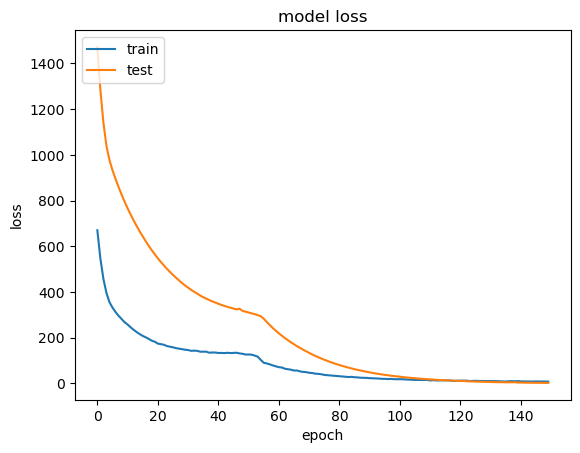

In [28]:
""" # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() """
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# predict model

11/11 [==============================] - 1s 3ms/step


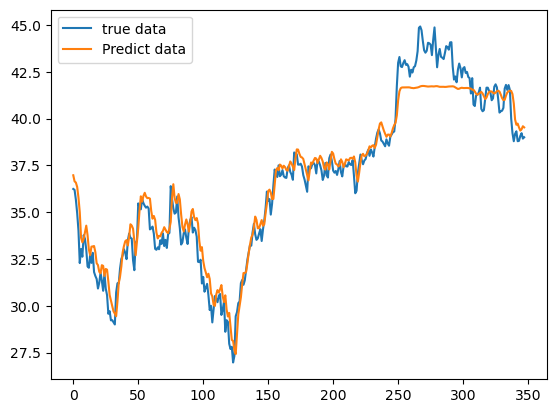

In [29]:
Predict = model.predict(testX)
plt.plot(testY,label = 'true data')
plt.plot(Predict, label="Predict data")
plt.legend()
plt.show()

In [30]:
print(Predict)

[[36.970524]
 [36.646965]
 [36.582806]
 [36.349705]
 [35.77834 ]
 [34.997707]
 [33.632305]
 [33.389683]
 [33.567562]
 [33.919426]
 [34.279232]
 [33.76852 ]
 [33.00433 ]
 [32.704254]
 [33.15858 ]
 [33.170723]
 [33.1916  ]
 [32.86591 ]
 [32.274303]
 [32.17214 ]
 [31.813208]
 [31.737625]
 [32.166973]
 [32.130516]
 [31.592909]
 [31.96573 ]
 [31.928534]
 [31.289913]
 [30.574081]
 [30.26546 ]
 [29.979506]
 [29.69809 ]
 [29.57966 ]
 [29.442337]
 [30.228659]
 [31.211138]
 [31.561062]
 [32.1006  ]
 [32.84373 ]
 [33.187706]
 [33.446487]
 [33.508636]
 [33.21948 ]
 [33.687435]
 [34.35435 ]
 [34.284626]
 [34.11687 ]
 [33.481155]
 [32.69984 ]
 [33.456676]
 [34.154   ]
 [35.093937]
 [35.846127]
 [35.562656]
 [35.86742 ]
 [36.03463 ]
 [35.83707 ]
 [35.74907 ]
 [35.760303]
 [35.723415]
 [35.063564]
 [34.651974]
 [34.79655 ]
 [34.594044]
 [33.91745 ]
 [33.59966 ]
 [33.734833]
 [33.712154]
 [33.90183 ]
 [33.999565]
 [34.19722 ]
 [34.066746]
 [33.933804]
 [33.885674]
 [34.116863]
 [34.47939 ]
 [35.77389 ]

In [31]:
print(testY)

[36.24 36.19 35.67 34.95 34.02 32.28 33.03 32.62 33.77 33.57 32.99 32.1
 32.03 32.74 32.29 32.83 31.8  31.59 31.43 30.92 31.23 31.77 31.33 30.8
 31.74 30.92 30.57 29.57 29.71 29.22 29.23 29.11 29.   30.71 31.2  31.19
 31.99 32.5  32.69 33.02 32.83 32.49 33.49 33.86 33.63 33.59 32.43 31.9
 33.36 33.49 35.47 35.27 35.15 35.7  35.48 35.34 35.24 35.3  35.2  34.08
 34.13 34.23 33.85 33.04 32.99 33.12 33.02 33.5  33.3  33.87 33.19 33.52
 33.09 33.83 33.89 36.39 35.72 35.2  34.92 34.98 35.84 34.73 34.15 33.27
 33.39 33.88 34.08 33.63 33.3  34.21 34.58 34.74 33.91 34.17 34.04 33.69
 32.35 32.33 32.46 31.19 31.54 30.75 30.97 31.17 30.57 29.77 30.   29.11
 29.8  30.52 30.39 30.19 30.53 30.63 29.51 29.79 30.23 28.61 29.23 29.14
 27.97 27.69 27.81 26.97 27.32 29.44 29.66 30.14 30.23 31.21 31.38 31.12
 31.36 31.9  32.46 32.85 33.24 33.21 33.93 34.38 33.82 33.52 33.6  33.86
 34.09 33.46 34.08 34.55 35.21 36.1  35.61 35.7  34.87 35.45 36.43 37.28
 37.02 36.88 37.5  36.92 37.   37.25 36.92 36.85 36.83